In [1]:
# Librerías a utilizar
import cv2 as cv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

<h2> Convirtiendo el tipo de imagen de .jfif a .jpg </h2>
<hr>

In [2]:
# Función de conversión
def conversor_jfif_jpg(carpeta_entrada, carpeta_salida):
    # Verifica si la carpeta existe. En caso de que no, la crea
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)
        
    # Recorre las imágenes de la carpeta de entrada
    for imagen in os.listdir(carpeta_entrada):
        entrada = os.path.join(carpeta_entrada, imagen)
        salida = os.path.join(carpeta_salida, os.path.splitext(imagen)[0] + '.jpg')
        
        # Lee la imagen .jfif
        img = cv.imread(entrada)
        
        # Guarda la imagen en .jpg
        cv.imwrite(salida, img, [int(cv.IMWRITE_JPEG_QUALITY), 100])

In [25]:
import requests
import time

def descargar_imagenes(urls, carpeta_destino):
    for i, url in enumerate(urls):
        
        # Realizar la solicitud GET a la URL de la imagen
        response = requests.get(url)
        
        # Obtener el contenido de la respuesta
        contenido = response.content

        # Extraer el nombre de archivo de la URL
        nombre_archivo = os.path.basename(url)
        
        # Ya que en este caso, las url contienen extensiones que llaman a las imágenes "original" u otros nombres,
        # se renombrarán estas imágenes para que no haya una sobreescritura en la descarga
        tiempo_escritura = int(time.time()) # Marca de tiempo actual
        nombre_unico_archivo = f"{nombre_archivo}_{tiempo_escritura}.jpg"

        # Construir la ruta de archivo completa para guardar la imagen
        ruta_archivo = os.path.join(carpeta_destino, nombre_unico_archivo)

        # Guardar el contenido de la imagen en el archivo
        with open(ruta_archivo, 'wb') as archivo:
            archivo.write(contenido)

        print(f"La imagen se ha descargado y guardado en: {ruta_archivo}")

In [3]:
df = pd.read_excel("Links_img_Chiguiro.xlsx", sheet_name = "Hoja1")
df_url = df["identifier"].tolist()
df_url

['https://inaturalist-open-data.s3.amazonaws.com/photos/776807/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/775151/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/773894/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/773893/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/276045/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/670679/original.JPG',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/659914/original.jpg',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/659905/original.jpg',
 'https://inaturalist-open-data.s3.amazonaws.com/photos/648407/original.JPG',
 'https://app.coeli.cat/coeli/ICUB-NAT/HeritageObject/N882200/portraitMedia',
 'https://app.coeli.cat/coeli/ICUB-NAT/HeritageObject/N897651/portraitMedia',
 'https://fm-digital-assets.fieldmuseum.org/534/414/CSZ49870.jpg',
 'http://fm-digital-assets.fieldmuseum.org/534/414/CSZ49870.jpg',
 'https:/

In [4]:
# Ya que en los links hay variaciones entre las mayúsculas y minúsculas en las extensiones y,
# además, hay algunos enlaces que no tienen ninguna extensión tipo imagen (.jpg, .png, .jpeg),
# se omitirán aquellos enlaces que no cumplan con dichas extensiones y se conservará la extensión
# entre mayúsculas y minúsculas para no dañar el link de la imagen, se la siguiente manera:

from urllib.parse import urlparse

extensiones_validas = [".jpg", ".png", ".jpeg"]
urls_img_validas = []

for url in df_url:
    
    url = str(url)
    # Extrae le extensión del link
    extension = os.path.splitext(urlparse(url).path)[1]
    
    # Verificación extensiones válidas
    if extension.lower() in extensiones_validas:
        urls_img_validas.append(url)

len(urls_img_validas)

5356

In [26]:
#descargar_imagenes(urls_img_validas, "Imagenes/1")

La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316969.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316970.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316971.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316972.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316974.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316974.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685316975.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685316976.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.JPG_1685316977.jpg
La imagen se ha descargado y guardado en: Imagenes/1\CSZ49870.jpg_1685316980.jpg
La imagen se ha descargado y guardado en: Imagenes/1\CSZ49870.jpg_1685316982.jpg
La imagen se ha descargado y guardado en: Imagenes/1\CSZ49870.jpg_1685316985.jpg
La imagen se ha descargado y

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317132.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317133.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317134.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317135.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317137.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317138.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317139.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317141.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317143.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317145.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317146.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317147.jpg
La imagen se ha 

La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317283.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317284.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317286.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317287.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317289.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317291.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317292.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317294.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317295.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317297.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317299.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317300.jpg
La imagen se ha de

La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317426.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317427.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317430.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317431.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317433.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317434.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317437.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317439.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317440.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317443.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317443.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317445.jpg
La imagen se ha descar

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317567.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317568.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317569.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317570.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317572.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.png_1685317575.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317577.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317578.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317579.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317580.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317580.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317583.jpg
La imagen se ha de

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317718.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317720.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317721.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317723.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317724.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317725.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317726.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317728.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317730.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317732.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317733.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317734.jpg
La imagen se ha d

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317875.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317877.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317878.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317879.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317880.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317882.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317883.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685317885.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317886.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317887.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317888.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685317891.jpg
La imagen se ha desca

La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318034.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318036.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318037.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318039.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318041.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318042.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318044.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318045.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318046.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318047.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318049.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318050.jpg
La imagen se ha des

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318186.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318188.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318189.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318190.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318192.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318194.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318195.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318196.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318197.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318199.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318200.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318201.jpg
La imagen se ha des

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318339.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318340.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318341.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318342.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318344.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318346.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318348.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318349.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318351.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318352.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318354.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318354.jpg
La imagen se ha desca

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318496.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318497.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318499.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318501.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318502.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318506.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318506.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318508.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318510.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318511.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318513.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318515.jpg
La imagen se ha des

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318635.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318636.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318638.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318639.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318640.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318641.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318642.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318644.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318645.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318647.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318648.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318650.jpg
La imagen se ha descarg

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318778.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318779.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318780.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318780.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318781.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318782.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318783.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318784.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318785.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318786.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318787.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318788.jpg
La imagen se ha desca

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318932.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318933.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318935.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318937.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318939.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318940.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318941.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318942.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318943.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318945.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685318946.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685318947.jpg
La imagen se ha descar

La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319070.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319072.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319073.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319074.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319076.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319077.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319078.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319080.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319081.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319082.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319084.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319087.jpg
La imagen se ha de

La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319236.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319238.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319239.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319241.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319242.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319243.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319246.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319250.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319253.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319254.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319256.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319257.jpg
La imagen se ha descargad

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319405.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319407.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319409.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319410.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319412.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319414.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319415.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319417.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319418.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319419.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319419.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319420.jpg
La imagen se ha desc

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319552.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319553.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319554.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319556.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319557.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319558.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319560.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319561.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319563.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319568.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319569.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319570.jpg
La imagen se ha descarg

La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319690.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319691.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319692.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319695.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319696.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319698.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319700.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319701.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319703.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319704.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpg_1685319706.jpg
La imagen se ha descargado y guardado en: Imagenes/1\original.jpeg_1685319707.jpg
La imagen se ha desc

KeyboardInterrupt: 

In [3]:
#### Proceso de conversion
#img_jfif = "Imagenes_jfif"
#img_jpg = "Imagenes"

#conversor_jfif_jpg(img_jfif, img_jpg)

In [5]:
img = cv.imread('Imagenes/116.jpg')
cv.imshow('Logo OpenCV', img)
cv.waitKey(0)
cv.destroyAllWindows()

<h2> Pre-procesamiento de imágenes </h2>
<hr>

In [5]:
# Rutas de las carpetas de entrenamiento y prueba
ruta_train = "Imagenes/train"
ruta_test = "Imagenes/test"

# Tamaño deseado de las imágenes
tamanio_imagen = (256, 256)

In [6]:
# Función para cargar las imágenes desde una carpeta y retornar un conjunto de datos
def cargar_imagenes(ruta_carpeta):
    imagenes = []
    etiquetas = []
    
    for etiqueta in os.listdir(ruta_carpeta):
        etiqueta_ruta = os.path.join(ruta_carpeta, etiqueta)
        
        for nombre_imagen in os.listdir(etiqueta_ruta):
            ruta_imagen = os.path.join(etiqueta_ruta, nombre_imagen)
            
            # Leer la imagen en escala de grises
            imagen = cv.imread(ruta_imagen, cv.IMREAD_GRAYSCALE)
            
            # Redimensionar la imagen al tamaño deseado
            imagen = cv.resize(imagen, tamanio_imagen)
            
            # Agregar la imagen y la etiqueta a las listas
            imagenes.append(imagen)
            etiquetas.append(etiqueta)
    
    # Convertir las listas a arreglos numpy
    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)
    
    return imagenes, etiquetas

In [7]:
# Cargar el conjunto de entrenamiento
imagenes_train, etiquetas_train = cargar_imagenes(ruta_train)

# Cargar el conjunto de prueba
imagenes_test, etiquetas_test = cargar_imagenes(ruta_test)

In [8]:
etiquetas_train

array(['Chiguiro', 'Chiguiro', 'Chiguiro', ..., 'Guatin', 'Guatin',
       'Guatin'], dtype='<U8')

In [9]:
from sklearn.preprocessing import LabelEncoder

etiquetas_train_cod = LabelEncoder().fit_transform(etiquetas_train)
etiquetas_test_cod = LabelEncoder().fit_transform(etiquetas_test)

In [10]:
etiquetas_train_cod

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

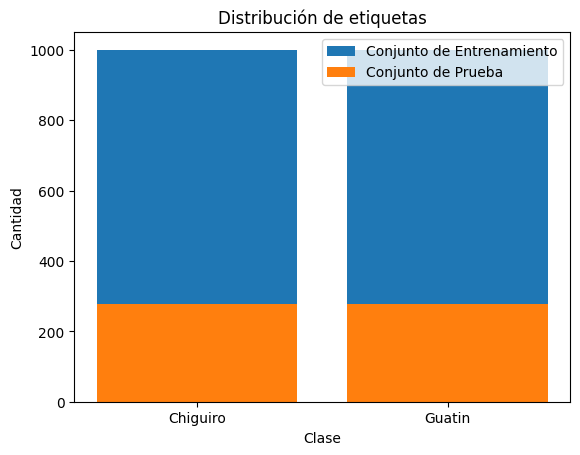

In [11]:
# Obtener el conteo de las etiquetas en el conjunto de entrenamiento
etiquetas_train_count = np.bincount(etiquetas_train_cod)

# Obtener el conteo de las etiquetas en el conjunto de prueba
etiquetas_test_count = np.bincount(etiquetas_test_cod)

# Etiquetas de las clases
clases = ['Chiguiro', 'Guatin']

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(clases, etiquetas_train_count, label = 'Conjunto de Entrenamiento')
ax.bar(clases, etiquetas_test_count, label = 'Conjunto de Prueba')

# Agregar etiquetas y título
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de etiquetas')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

In [12]:
# Normalización de las imágenes
imagenes_train = imagenes_train/255
imagenes_test = imagenes_test/255

In [13]:
print(type(imagenes_train), (len(imagenes_test)))

<class 'numpy.ndarray'> 554


<h2> Procesamiento de imágenes </h2>
<hr>

In [16]:
# Construyendo la red neuronal convolucional

# Definir el modelo
modelo = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
historial_1 = modelo.fit(imagenes_train, etiquetas_train_cod, epochs=10, validation_data=(imagenes_test, etiquetas_test_cod))


Epoch 1/10
63/63 [==============================] - 131s 2s/step - loss: 1.1323 - accuracy: 0.5955 - val_loss: 0.6912 - val_accuracy: 0.5199
Epoch 2/10
63/63 [==============================] - 130s 2s/step - loss: 0.4946 - accuracy: 0.7640 - val_loss: 0.5506 - val_accuracy: 0.7040
Epoch 3/10
63/63 [==============================] - 129s 2s/step - loss: 0.3279 - accuracy: 0.8700 - val_loss: 0.4500 - val_accuracy: 0.7960
Epoch 4/10
63/63 [==============================] - 129s 2s/step - loss: 0.1875 - accuracy: 0.9350 - val_loss: 0.5576 - val_accuracy: 0.7708
Epoch 5/10
63/63 [==============================] - 129s 2s/step - loss: 0.0981 - accuracy: 0.9680 - val_loss: 0.7978 - val_accuracy: 0.7653
Epoch 6/10
63/63 [==============================] - 129s 2s/step - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.8061 - val_accuracy: 0.7635
Epoch 7/10
63/63 [==============================] - 129s 2s/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 1.2929 - val_accuracy: 0.7365
Epoch 8/10
63

<p> Aquí, se puede observar una gran precisión en el entrenamiento de la red (99.35%). Sin embargo, la precisión en la validación es muy bajo en comparación (70.94%), lo que indica un sobreajuste en el modelo de entrenamiento.</p>

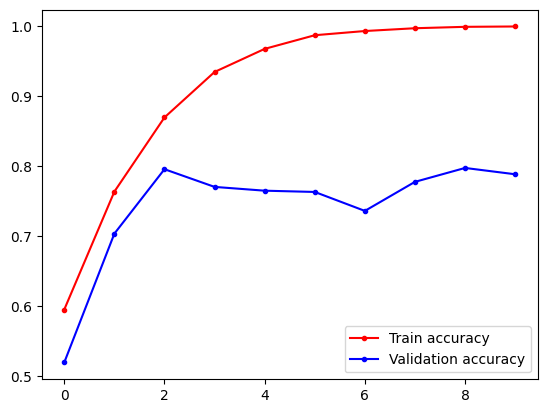

In [22]:
fig, ax = plt.subplots()
ax.plot(historial_1.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(historial_1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()

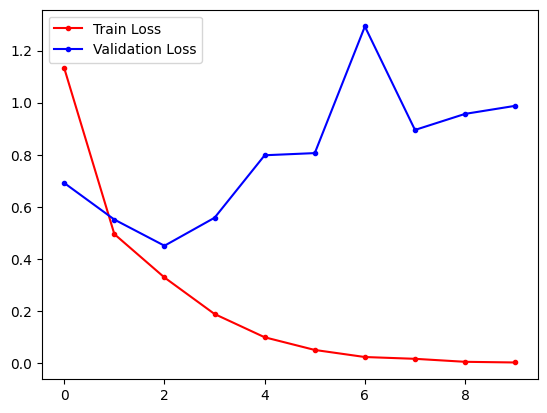

In [17]:
#modelo.history.keys()

fig, ax = plt.subplots()
ax.plot(historial_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(historial_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

<h3> Pruebas de predicción </h3>
<hr>

In [54]:
def cargar_imagen_individual(ruta_imagen):
    tamanio_imagen = (256, 256)
    imagen = cv.imread(ruta_imagen, cv.IMREAD_GRAYSCALE)
    imagen = cv.resize(imagen, tamanio_imagen)
    imagen = np.expand_dims(imagen, axis = -1)
    return imagen


1/1 [==============================] - 0s 76ms/step


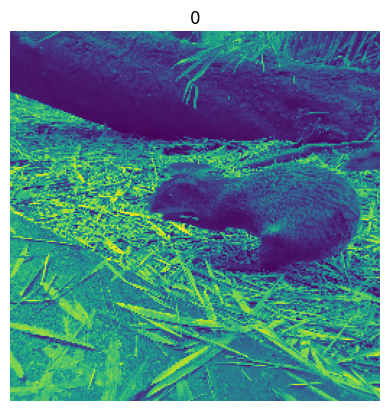

La imagen corresponde a Guatin


In [55]:
# Ejemplo de predicción

# Cargar la imagen individual que deseas clasificar (reemplaza 'ruta_imagen' con la ruta correcta)
imagen = cargar_imagen_individual('Imagenes/test/Guatin/IMG_20230524_160523.jpg')

# Preprocesar la imagen de la misma manera que se hizo con el conjunto de entrenamiento

# Pasar la imagen preprocesada a través del modelo para obtener la predicción
prediccion = modelo.predict(np.expand_dims(imagen, axis=0))

# Obtener la clase con la mayor probabilidad
clase_predicha = np.argmax(prediccion)

# Obtener la descripción de la clasificación basada en la clase predicha
descripcion = etiquetas_train_cod[clase_predicha]

# Graficar la imagen y mostrar la descripción de la clasificación
plt.imshow(imagen)
plt.title(descripcion)
plt.axis('off')
plt.show()

if descripcion == 0:
    descripcion = "Guatin"
else:
    descripcion = "Chiguiro"

print(f"La imagen corresponde a {descripcion}")

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_clases = 2

modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(256, 256, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(64, (3, 3), activation='sigmoid'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Flatten())
modelo.add(Dense(128, activation='sigmoid'))
modelo.add(Dropout(0.5))

modelo.add(Dense(num_clases, activation='softmax'))

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historial_3 = modelo.fit(imagenes_train, etiquetas_train_cod, epochs=10, validation_data=(imagenes_test, etiquetas_test_cod))

Epoch 1/10
63/63 [==============================] - 298s 4s/step - loss: 2.0794 - accuracy: 0.5055 - val_loss: 0.7950 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 198s 3s/step - loss: 0.7628 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 199s 3s/step - loss: 0.7463 - accuracy: 0.5105 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 200s 3s/step - loss: 0.7287 - accuracy: 0.5160 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 200s 3s/step - loss: 0.7303 - accuracy: 0.4865 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 200s 3s/step - loss: 0.7191 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 213s 3s/step - loss: 0.7181 - accuracy: 0.4785 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 8/10
63

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_clases = 2

modelo = tf.keras.models.Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dense(128, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dense(64, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dense(32, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Dropout(0.2))

modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(num_clases, activation='softmax'))

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historial_4 = modelo.fit(imagenes_train, etiquetas_train_cod, epochs=10, validation_data=(imagenes_test, etiquetas_test_cod))

Epoch 1/10
63/63 [==============================] - 184s 3s/step - loss: 0.6939 - accuracy: 0.5340 - val_loss: 0.6786 - val_accuracy: 0.5018
Epoch 2/10
63/63 [==============================] - 172s 3s/step - loss: 0.6254 - accuracy: 0.6380 - val_loss: 0.4395 - val_accuracy: 0.8141
Epoch 3/10
63/63 [==============================] - 181s 3s/step - loss: 0.4553 - accuracy: 0.8015 - val_loss: 0.3672 - val_accuracy: 0.8718
Epoch 4/10
63/63 [==============================] - 170s 3s/step - loss: 0.3986 - accuracy: 0.8310 - val_loss: 0.4173 - val_accuracy: 0.8321
Epoch 5/10
63/63 [==============================] - 174s 3s/step - loss: 0.3506 - accuracy: 0.8540 - val_loss: 0.3335 - val_accuracy: 0.8736
Epoch 6/10
63/63 [==============================] - 173s 3s/step - loss: 0.3361 - accuracy: 0.8600 - val_loss: 0.3602 - val_accuracy: 0.8520
Epoch 7/10
63/63 [==============================] - 173s 3s/step - loss: 0.3514 - accuracy: 0.8535 - val_loss: 0.5188 - val_accuracy: 0.7978
Epoch 8/10
63

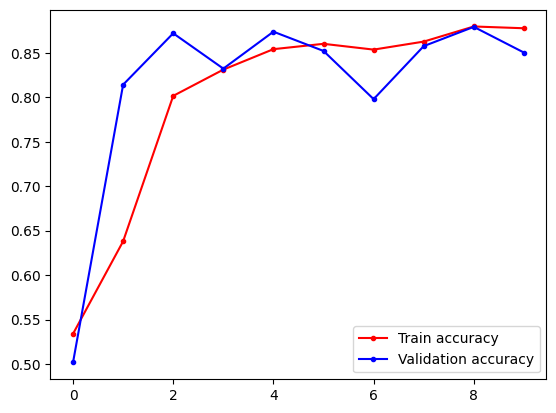

In [21]:
fig, ax = plt.subplots()
ax.plot(historial_4.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(historial_4.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()

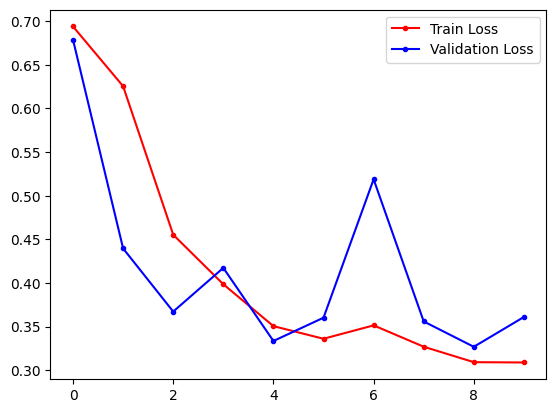

In [19]:
fig, ax = plt.subplots()
ax.plot(historial_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(historial_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()